In [46]:
# import necessary library

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats

In [40]:
# the optimal number of taps estimated with Bellanger method 

def tap_calc(rate, width):
    deltap = 0.005
    deltas = 0.002
    tap = np.ceil((-2/3)*np.log10(10*deltap*deltas)*rate/width)

    return int(tap)

In [53]:
# demo
# rate means sample rate
# width means the width of transion zone {Hz}

tap = tap_calc(rate=1000, width=20)
print(tap)

134


In [48]:
# show the frequency respose of the generated filter (only for the bandpass filter)
# band sould be list

def freq_response_bandpass(taps, band, rate): 
    sample_filter = signal.firwin(numtaps=taps, cutoff=band, pass_zero=False, fs=rate)
    w, h = signal.freqz(sample_filter)
    plt.figure(figsize=(10, 3))
    plt.plot(np.linspace(0, rate/2, len(w)), 20 * np.log10(abs(h)))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magunitude [dB]")
    plt.tight_layout()
    plt.show()

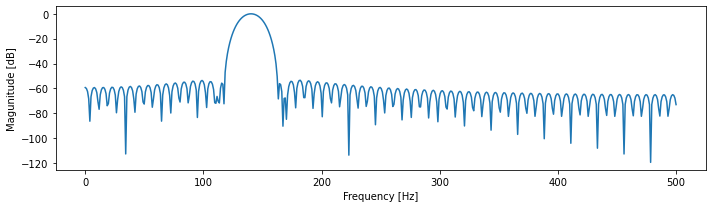

In [54]:
# demo
freq_response_bandpass(taps=134, band=[130, 150], rate=1000)

In [42]:
# Modulation Index (MI) calculation

def MI_calculation(raw_array, rate, cutoff_low, cutoff_high, numtaps=255, bins=18):
    
    # define t
    t = np.arange(0, len(raw_array)/rate, 1/rate)
    
    # set main figure
    fig, ax = plt.subplots(5, 1, figsize=(20, 10), sharex=True)
    plt.xlabel("Time [s]")

    # plot raw signal
    ax[0].plot(t, raw_array, color="black", label="raw")
    ax[0].legend()
    
    # set low frequency bandpass filter and plot filtered signal
    filter1 = signal.firwin(numtaps=numtaps, cutoff=cutoff_low, pass_zero=False, fs=rate)
    y1 = signal.lfilter(filter1, 1, raw_array)

    ax[1].plot(t, y1, label="filtered_1", color="blue")
    ax[1].legend()
    
    # set high frequency bandpass filter and plot filtered signal
    filter2 = signal.firwin(numtaps=numtaps, cutoff=cutoff_high, pass_zero=False, fs=rate)
    y2 = signal.lfilter(filter2, 1, raw_array)

    ax[2].plot(t, y2, label="filtered_2", color="red")
    ax[2].legend()
    
    # Hilbert transform (HT) of low frequency filtered signal
    h1 = signal.hilbert(y1)
    deg = np.rad2deg(np.angle(h1))

    ax[3].plot(t, deg, label="HT from filtered_1", color="blue")
    ax[3].set_ylabel("degree [˚]")
    ax[3].legend()
    
    # Hilbert transform of high frequency filtered signal to extract amplitude envelope
    h2 = signal.hilbert(y2)
    envelop = np.abs(h2)

    ax[4].plot(t, envelop, label="HT from filtered_2", color="red")
    ax[4].set_ylabel("amplitude envelop")
    ax[4].legend()

    plt.tight_layout()
    
    # show graph of the mean envelop with 20˚ interval
    plt.figure(figsize=(10, 5))
    mean, _, _ = stats.binned_statistic(deg, envelop, bins=bins)
    x = np.linspace(10, 350, bins)
    plt.bar(x, mean, width=18, color="black", ec="white", align="center", alpha=0.5)
    plt.xticks(np.linspace(0, 360, bins+1))
    plt.xlabel("Phase [˚]")
    plt.ylabel("mean amplitude envelop")
    plt.show()
    
    # calculate Modulation Index (MI)
    p = mean/sum(mean)
    H = -1*sum(p*np.log(p))
    MI = (np.log(bins)-H)/np.log(bins)

    print(f"MI is {MI:.5f}")
    
    return MI

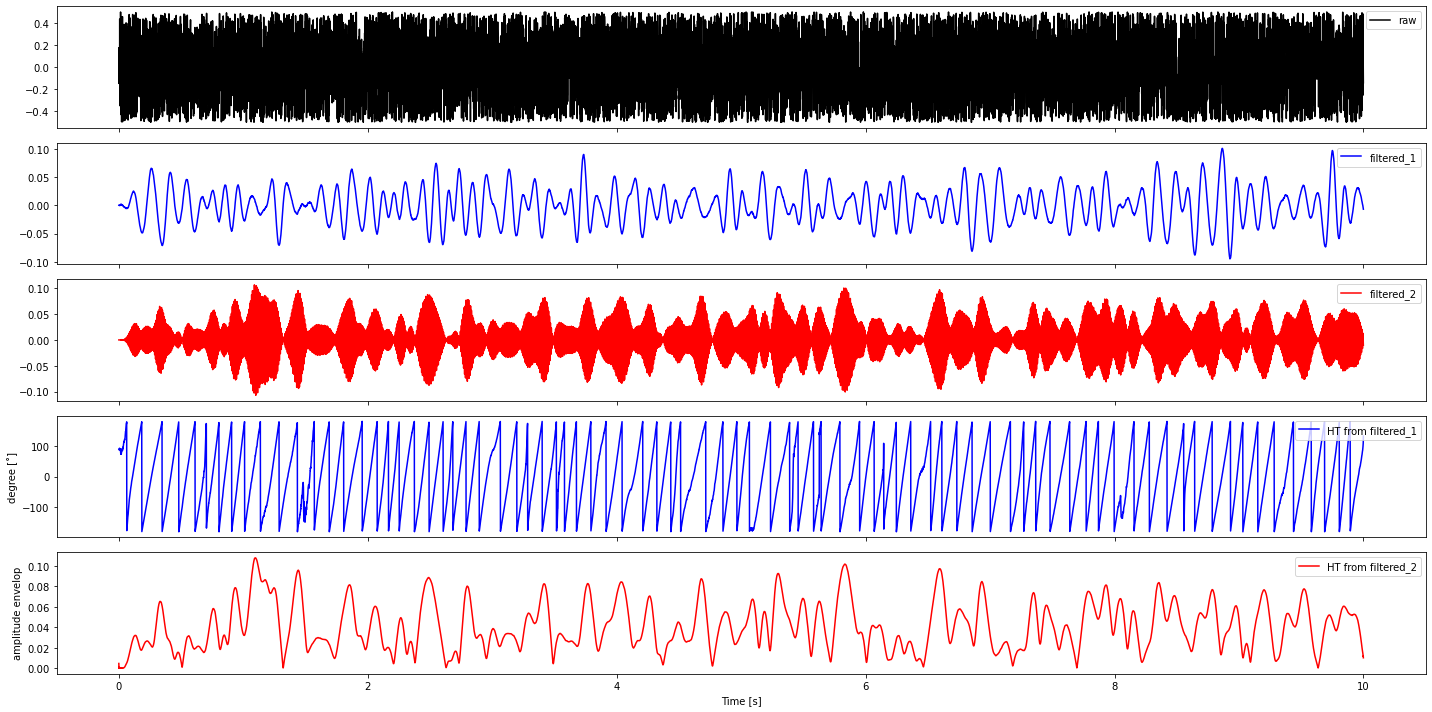

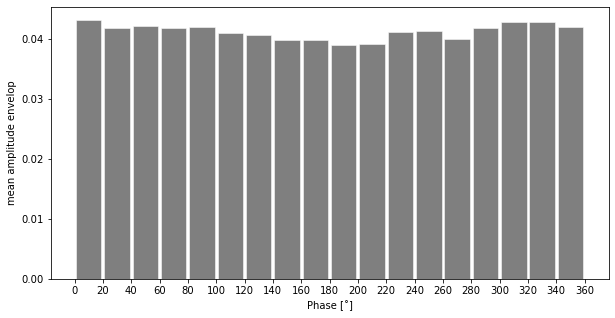

MI is 0.00015


0.00015347205256140947

In [45]:
# demo

## raw should be array
## rate should be integer
## cutoff_low and cutoff_high should be list
## bins sould be integer and default number is 18


raw = np.random.rand(10000)-0.5

MI_calculation(raw, 1000, [7, 9], [130, 140], numtaps=255)